In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import os

In [3]:
"""
ALL IMG CLF: 196

YOLO 4PU: 300
YOLO 8GPU: 300

BERT 4GPU: 1110
BERT 8GPU: 111
"""

'\nALL IMG CLF: 196\n\nYOLO 4PU: 300\nYOLO 8GPU: 300\n\nBERT 4GPU: 1110\nBERT 8GPU: 111\n'

In [4]:
def getFileList(path):
    return [path+f for f in listdir(path)]

def preprocess(path):
    with open(path, "r") as f:
        lines = f.readlines()
    
    del_lines = [0,1,2,4]

    with open(path, "w") as f:
        for l in range(len(lines)):
            if l in del_lines:
                continue
            f.write(lines[l])

In [44]:
# preprocess("./DNNs_DGX/bert_1110/BERT.csv")
# preprocess("./DNNs_DGX/bert_1110/BERT_X1.csv")
# preprocess("./DNNs_DGX/bert_1110/BERT_X2.csv")
# preprocess("./DNNs_DGX/bert_1110/BERT_X1Y1.csv")

In [5]:
def iteratize(path, iters):
    df = pd.read_csv(path)
    durs = df["Duration"].to_numpy()
    step = int(len(durs)/iters)
    vector = [sum(durs[i*step:(i+1)*step]) for i in range(iters)]
    return np.array(vector)

In [6]:
def adaptive(dict):
    keys = list(dict.keys())
    iters = len(dict[keys[0]])
    dm1 = int(100/200*iters)
    dm2 = dm1+int(50/200*iters)

    output = np.concatenate((dict[keys[2]][:dm1], dict[keys[1]][dm1:dm2], dict[keys[0]][dm2:]))
    return output


In [7]:
imgclf_iters = 196
bert4_iter = 555
bert8_iter = 111
yolo4_iter = 150
yolo8_iter = 150


## completed

In [ ]:
resnet4_dict = {
    "Baseline": iteratize("./dnn_workloads_dgx/resnet50/RESNET50.csv", imgclf_iters),
    "Skip 1RS": iteratize("./dnn_workloads_dgx/resnet50/RESNET50_X1.csv", imgclf_iters),
    "Skip 2RS": iteratize("./dnn_workloads_dgx/resnet50/RESNET50_X2.csv", imgclf_iters),
    "Skip 1RS1AG": iteratize("./dnn_workloads_dgx/resnet50/RESNET50_X1Y1.csv", imgclf_iters)
    
}

In [ ]:
resnet8_dict = {
    "Baseline": iteratize("./dnn_workloads_rtx/resnet50/RESNET50.csv", imgclf_iters),
    "Skip 2RS": iteratize("./dnn_workloads_rtx/resnet50/RESNET50_X2.csv", imgclf_iters),
    "Skip 4RS": iteratize("./dnn_workloads_rtx/resnet50/RESNET50_X4.csv", imgclf_iters),
    "Skip 2RS2AG": iteratize("./dnn_workloads_rtx/resnet50/RESNET50_X2Y2.csv", imgclf_iters)
}

In [ ]:
vgg4_dict = {
    "Baseline": iteratize("./dnn_workloads_dgx/vgg16/VGG16.csv", imgclf_iters),
    "Skip 1RS": iteratize("./dnn_workloads_dgx/vgg16/VGG16_X1.csv", imgclf_iters),
    "Skip 2RS": iteratize("./dnn_workloads_dgx/vgg16/VGG16_X2.csv", imgclf_iters),
    "Skip 1RS1AG": iteratize("./dnn_workloads_dgx/vgg16/VGG16_X1Y1.csv", imgclf_iters)
}

In [7]:
vgg8_dict = {
    "Baseline": iteratize("./dnn_workloads_rtx/vgg16/VGG16.csv", imgclf_iters),
    "Skip 2RS": iteratize("./dnn_workloads_rtx/vgg16/VGG16_X2.csv", imgclf_iters),
    "Skip 4RS": iteratize("./dnn_workloads_rtx/vgg16/VGG16_X4.csv", imgclf_iters),
    "Skip 2RS2AG": iteratize("./dnn_workloads_rtx/vgg16/VGG16_X2Y2.csv", imgclf_iters)
}

In [8]:
bert4_dict = {
    "Baseline": iteratize("./DNNs_DGX/bert/BERT.csv", bert4_iter),
    "Skip 1RS": iteratize("./DNNs_DGX/bert/BERT_X1.csv", bert4_iter),
    "Skip 2RS": iteratize("./DNNs_DGX/bert/BERT_X2.csv", bert4_iter),
    "Skip 1RS1AG": iteratize("./DNNs_DGX/bert/BERT_X1Y1.csv", bert4_iter)
}

In [ ]:
bert8_dict = {
    "Baseline": iteratize("./dnn_workloads_rtx/bert/BERT.csv", bert8_iter),
    "Skip 2RS": iteratize("./dnn_workloads_rtx/bert/BERT_X2.csv", bert8_iter),
    "Skip 4RS": iteratize("./dnn_workloads_rtx/bert/BERT_X4.csv", bert8_iter),
    "Skip 2RS2AG": iteratize("./dnn_workloads_rtx/bert/BERT_X2Y2.csv", bert8_iter)
}

In [31]:
yolo8_dict = {
    "Baseline": iteratize("./dnn_workloads_rtx/yolo_old/YOLO.csv", yolo8_iter),
    "Skip 2RS": iteratize("./dnn_workloads_rtx/yolo_old/YOLO_X2.csv", yolo8_iter),
    "Skip 4RS": iteratize("./dnn_workloads_rtx/yolo_old/YOLO_X4.csv", yolo8_iter),
    "Skip 2RS2AG": iteratize("./dnn_workloads_rtx/yolo_old/YOLO_X2Y2.csv", yolo8_iter)
}

In [9]:
def plot_statistics(input, savepath):
    fig, ax = plt.subplots(figsize=(10,5), facecolor='white')

    settings = dict(linestyle='-', linewidth=2, color='red')
    bplot = ax.boxplot(input.values(), sym='', meanline=True, vert=True, patch_artist=True, medianprops=settings)
    ax.set_xticklabels(input.keys())

    colors = ['cornflowerblue', 'peachpuff', 'palegreen', 'mistyrose']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    #plt.xlabel("Method", fontsize=16)
    plt.grid(axis='y', linestyle='dashed')
    plt.ylabel("Time per iteration, ms", fontsize=16)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(axis='x', which='major', labelsize=16)
    plt.savefig(savepath, dpi=600, bbox_inches="tight")
        

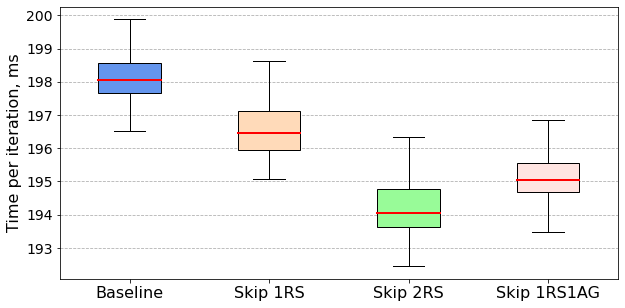

In [10]:
plot_statistics(bert4_dict, "./plots/check.png")